<a href="https://colab.research.google.com/github/ORCT/ds-section1-project/blob/main/Q4_What_game_do_we_make.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4. 우리는 어떤 게임을 출시하면 좋을까?

플랫폼, 출시 시기, 장르, 국가

###4-1. 플랫폼 별로 출고량이 높은 장르는 무엇일까

In [1]:
from google.colab import files
files.upload();

Saving pre_vgames.csv to pre_vgames.csv


In [2]:
import pandas as pd

df = pd.read_csv('pre_vgames.csv', index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16472,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16473,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16474,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16475,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

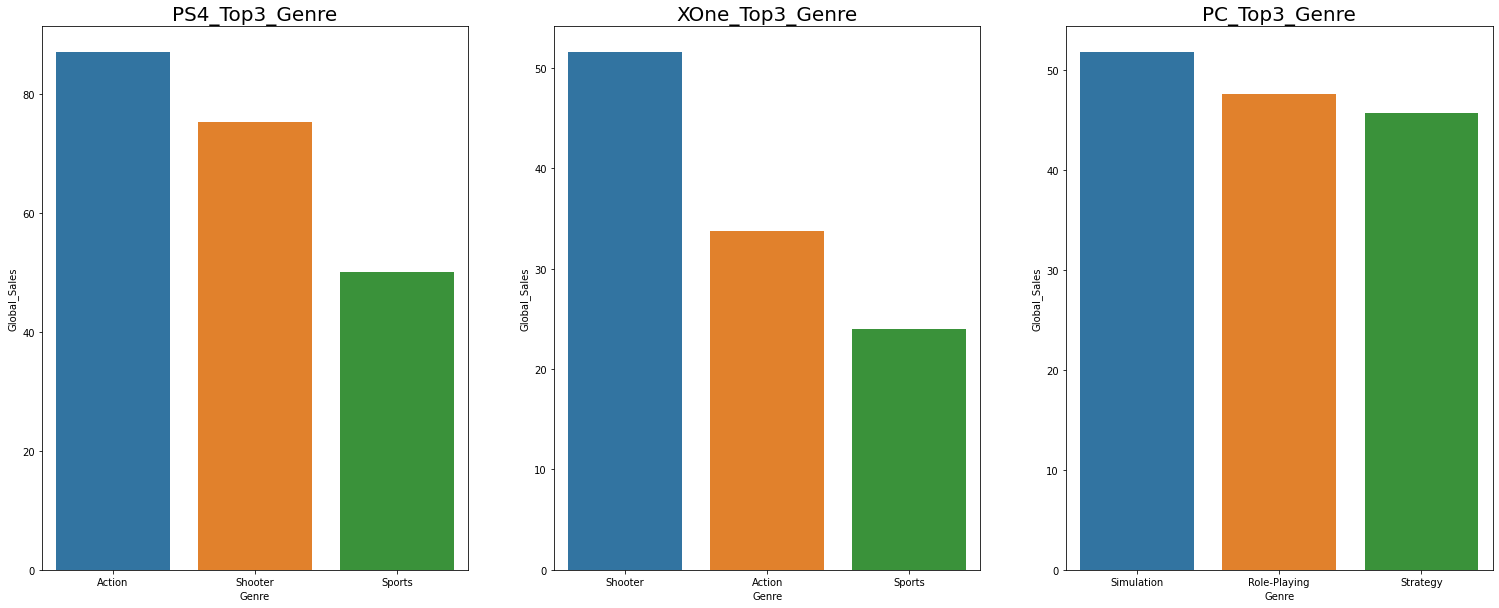

In [19]:
ps4 = df[df['Platform'] == 'PS4']
xone = df[df['Platform'] == 'XOne']
pc = df[df['Platform'] == 'PC']

ps4_top3_genre = ps4.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)[0:3].to_frame().reset_index()
xone_top3_genre = xone.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)[0:3].to_frame().reset_index()
pc_top3_genre = pc.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)[0:3].to_frame().reset_index()

fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=3)
sns.barplot(x='Genre',y='Global_Sales',data=ps4_top3_genre, ax=axs[0])
sns.barplot(x='Genre',y='Global_Sales',data=xone_top3_genre, ax=axs[1])
sns.barplot(x='Genre',y='Global_Sales',data=pc_top3_genre, ax=axs[2])

axs[0].set_title("PS4_Top3_Genre",fontsize=20)
axs[1].set_title("XOne_Top3_Genre",fontsize=20)
axs[2].set_title("PC_Top3_Genre",fontsize=20)
plt.show()

각 플랫폼에서 가장 많이 팔린 장르는 PS4 : Action, XOne : Shooter, PC : Simulation 이다. 따라서 PS4 플랫폼으로 게임을 출시한다면 Action, XOne이라면 Shooter, PC라면 Simulation 장르의 게임을 출시하는 것이 유리할 것으로 보인다.

###4-2. 최근 5년간의 최다 판매 타이틀, 장르, 플랫폼은 무엇일까?

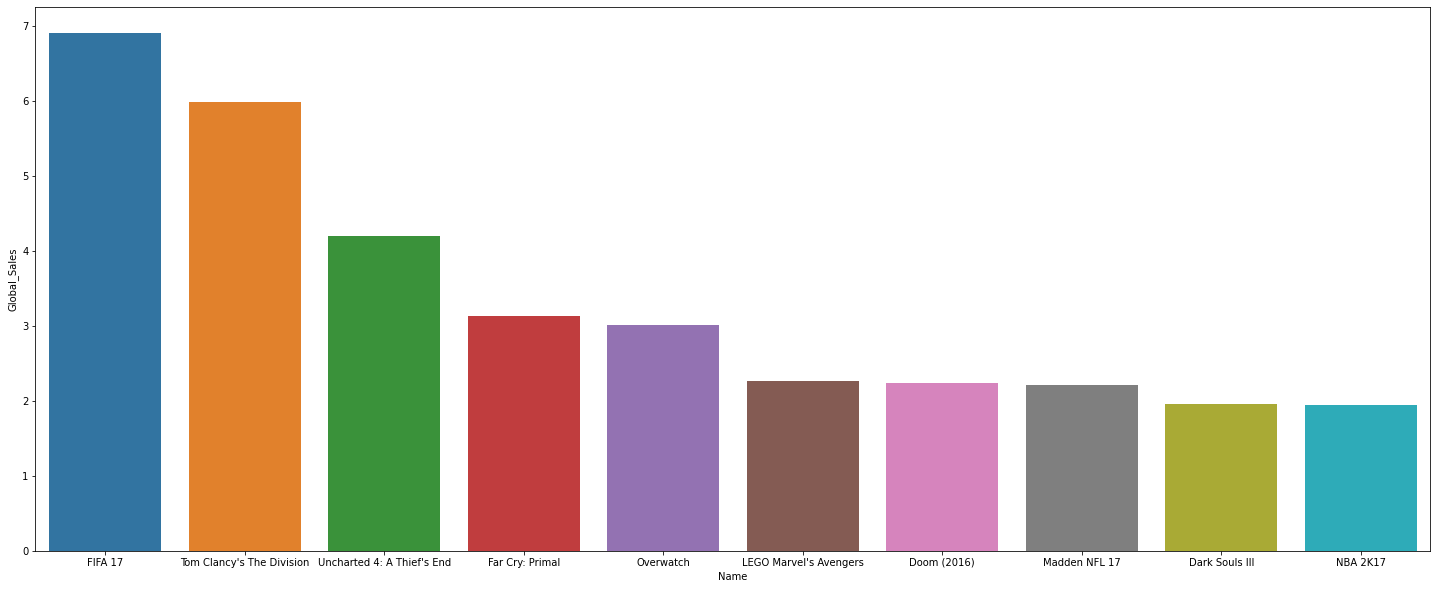

In [25]:
recent = df[df['Year'] >= 2016]
recent_top10_title = recent.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)[0:10].to_frame().reset_index()

plt.figure(figsize=(25,10))
sns.barplot(x='Name',y='Global_Sales',data=recent_top10_title)

최근 5년 동안에 가장 많이 팔린 타이틀은 FIFA 17이다.

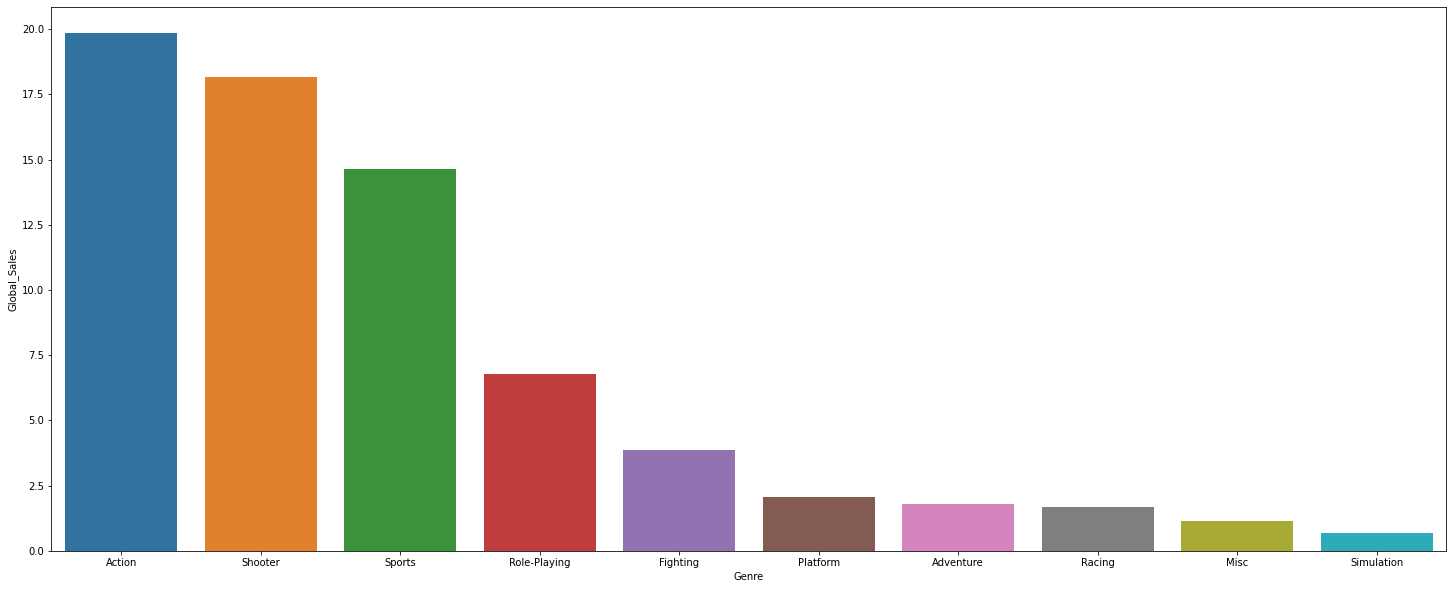

In [27]:
recent_top10_genre = recent.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)[0:10].to_frame().reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x='Genre',y='Global_Sales',data=recent_top10_genre)

최근 5년간 가장 출고량이 높은 장르는 Action 장르다.

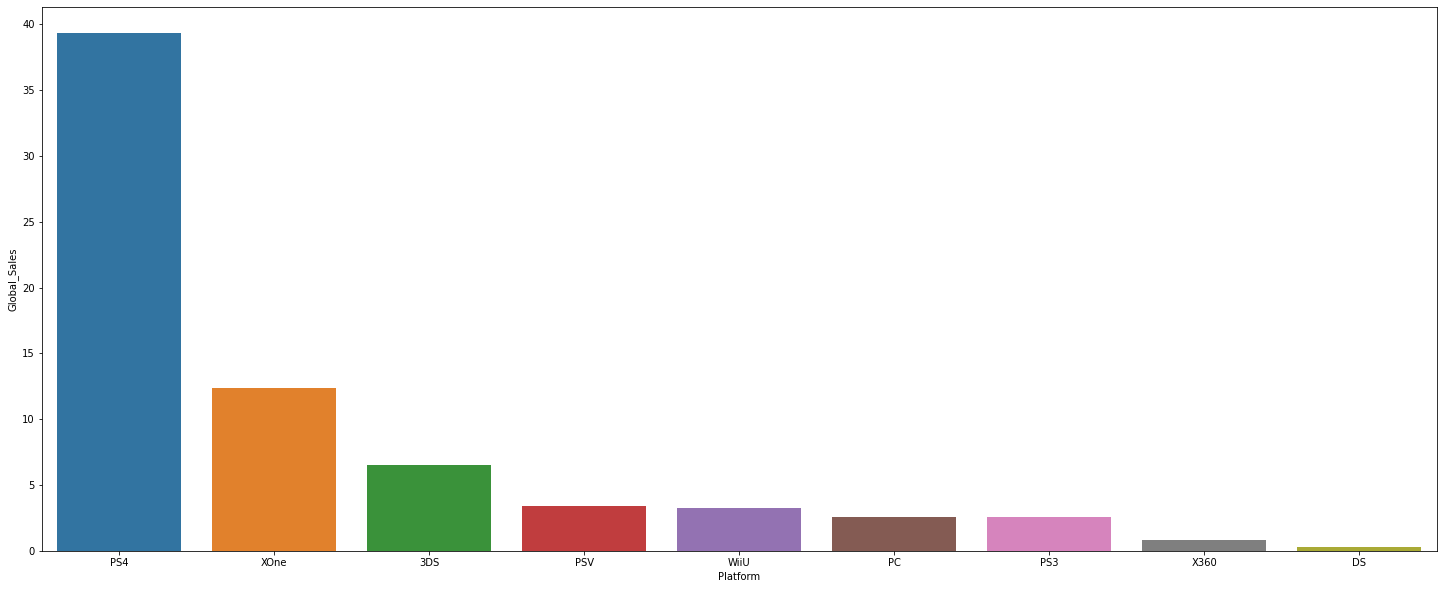

In [28]:
recent_top10_pl = recent.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)[0:10].to_frame().reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x='Platform',y='Global_Sales',data=recent_top10_pl)

최근 5년간 가장 게임 출고량이 높은 플랫폼은 PS4이다.

계속해서 가장 많이 팔린 타이틀은 Action 장르가 아니라는 점은 눈여겨 볼만한 점이라고 생각하지만 Wii Sports 처럼 이질적이거나, FIFA처럼 연도가 바뀌면 실제 로스터로 인한 신작 구매가 필수적인 경우처럼 단순하게 판매량으로만 판단하기 힘들기에 아예 신작을 내야 하는 우리 회사 입장에서는 무작정 참고하기에는 어려운 데이터라고 생각한다.

우리는 타이틀 자체보다는 장르나 플랫폼, 연도를 반영한 트렌드를 따르는 것이 매출에 유리할 것으로 예상한다.

따라서 PS4 플랫폼으로 액션 장르의 게임을 출시하는 것이 나을 것으로 보인다.